# Regressão Linear - Predição da Idade

### importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### ler train.csv e test.csv

In [3]:
train = pd.read_csv('titanic/train.csv')

In [4]:
test = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index

In [7]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [10]:
train.set_index('PassengerId', inplace=True)

In [ ]:
test.set_index('PassengerId', inplace=True)

In [15]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [16]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


### Verificar shape dos dois

In [19]:
train.shape

(891, 11)

In [20]:
test.shape

(418, 10)

### Criar coluna "Survived" no test set

In [22]:
test['Survived'] = np.nan

In [24]:
test.shape

(418, 11)

In [25]:
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN


### Conferir shape novamente

In [26]:
train.shape, test.shape

((891, 11), (418, 11))

### Concatenar train e test set

In [27]:
data =  pd.concat([train, test], sort=False)

In [28]:
data.shape

(1309, 11)

### Traduzir colunas

In [31]:
data.columns = [
                'Sobreviveu', 
                'Classe', 
                'Nome', 
                'Sexo', 
                'Idade', 
                'IrmaosConjuge', 
                'PaisFilhos', 
                'Bilhete',
                'Tarifa', 
                'Cabine', 
                'Embarque'
               ]

In [32]:
data.columns

Index(['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosConjuge',
       'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque'],
      dtype='object')

### Traduzir Sexo

In [36]:
data['Sexo'] = data['Sexo'].map({'male':'homem', 'female':'mulher'})

In [37]:
data['Sexo']

PassengerId
1        homem
2       mulher
3       mulher
4       mulher
5        homem
         ...  
1305     homem
1306    mulher
1307     homem
1308     homem
1309     homem
Name: Sexo, Length: 1309, dtype: object

### Averiguar dados nulos

In [38]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuge       0
PaisFilhos          0
Bilhete             0
Tarifa              1
Cabine           1014
Embarque            2
dtype: int64

### Remover Cabine

In [39]:
data.drop('Cabine',  axis=1, inplace=True)

### Checar dados nulos novamente

In [40]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           2
dtype: int64

### Preencher dados nulos de "Embarque" com a moda

In [41]:
data['Embarque'].uniqueue()

array(['S', 'C', 'Q', nan], dtype=object)

In [45]:
moda = data['Embarque'].mode()[0]
moda

'S'

In [46]:
data['Embarque'].fillna(moda, inplace=True)

### Checar dados nulos novamente

In [49]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           0
dtype: int64

### Preencher "Tarifa" faltando com a média

In [48]:
media = data['Tarifa'].mean()

In [51]:
data['Tarifa'].fillna(media, inplace=True)

### Checar dados nulos

In [52]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

### Verificar correlações

In [54]:
data.corr()

,Sobreviveu,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaosConjuge,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


### Visualizar correlações com "heatmap"

<AxesSubplot:>

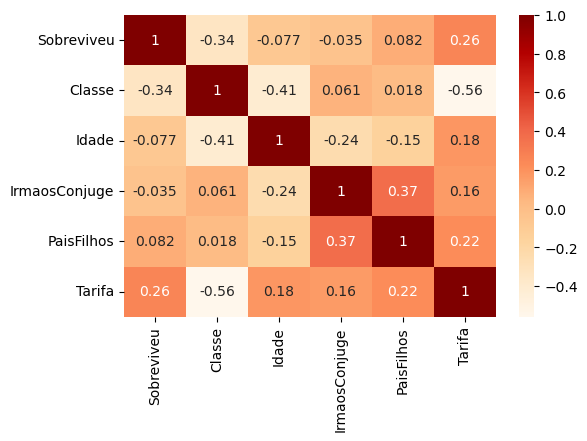

In [59]:
f, ax = plt.subplots(dpi=100)
sns.heatmap(data.corr(), annot=True, cmap='OrRd')

### Remover coluna "Sobreviveu"
Aparentemente não tem muita correlação com Idade, e está faltando bastante dados

In [ ]:
data.drop('Sobreviveu', axis=1, inplace=True)

### Checar dados nulos

In [65]:
data.isnull().sum()

Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

# Engenharia de Recursos I

### Criar coluna "Titulo" baseando-se na coluna "Nome"

In [106]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [107]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [108]:
lista_titulos = ['Mr', 'Master', 'Miss', 'Mrs']

In [109]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in lista_titulos else x)

In [110]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [111]:
dict_Titulo = {
    'Master': 'menino',
    'Miss': 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs': 'MulherCasada',
    'Outros': 'Outros'
}

In [112]:
data['Titulo'] = data['Titulo'].map(dict_Titulo)

In [113]:
data['Titulo']

PassengerId
1        HomemAdulto
2       MulherCasada
3           Solteira
4       MulherCasada
5        HomemAdulto
            ...     
1305     HomemAdulto
1306          Outros
1307     HomemAdulto
1308     HomemAdulto
1309          menino
Name: Titulo, Length: 1309, dtype: object

In [116]:
data['Titulo'].unique()

array(['HomemAdulto', 'MulherCasada', 'Solteira', 'menino', 'Outros'],
      dtype=object)

### Averiguar informações do DataFrame

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Classe         1309 non-null   int64  
 1   Nome           1309 non-null   object 
 2   Sexo           1309 non-null   object 
 3   Idade          1046 non-null   float64
 4   IrmaosConjuge  1309 non-null   int64  
 5   PaisFilhos     1309 non-null   int64  
 6   Bilhete        1309 non-null   object 
 7   Tarifa         1309 non-null   float64
 8   Embarque       1309 non-null   object 
 9   Titulo         1309 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 144.8+ KB


### Remover "Bilhete" e "Nome"

In [118]:
# remover a coluna 'Nome'
data.drop('Nome', axis=1, inplace=True)

In [ ]:
# remover a coluna 'Bilhete'
data.drop('Bilhete', axis=1, inplace=True)

# Os dois passoa acima podem ser substituidos pelo comando unico
# data.drop(['Nome', 'Bilhete'], axis=1, inplace=True)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Classe         1309 non-null   int64  
 1   Sexo           1309 non-null   object 
 2   Idade          1046 non-null   float64
 3   IrmaosConjuge  1309 non-null   int64  
 4   PaisFilhos     1309 non-null   int64  
 5   Tarifa         1309 non-null   float64
 6   Embarque       1309 non-null   object 
 7   Titulo         1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 124.3+ KB


# Engenharia de Recursos II

### Estudar possibilidade de identificar "meninas" similar aos "meninos"
Através da combinação: "solteira" e está com "pais"

### idade média de "meninas solteiras acompanhadas dos pais"

### verificar distribuição da idade

### Média de mulheres "solteiras"

### Distribuição das idades de mulheres "solteiras"

### Média de idade de mulheres "casadas"

### Distribuição das idades de mulheres "casadas"

### Adicionar coluna "solteira com pais"

### Transformar recursos categóricos em "dummies"

### Separar train e test para idades
* treinar com dados não nulos
* aplicar modelo em dados nulos

## Definir X e y para treinar o modelo

### Importar modelo regressivo

### Instanciar modelo

### Importar train_test_split para preparar para treino

### Dividir 70% para treinar, 30% para testar

### Treinar modelo

### Fazer predição

### Importar mean_squared_error (erro quadrado médio)

### Averiguar score

### Averiguar rmse

### Visualizar resíduos em scatterplot

<a name="tarifa"></a>

### Aplicar modelo nos dados nulos

### Criar coluna Idade contendos as predições

### Averiguar shapes

### Concatenar dados

### Criar DataFrame contendo "IdPassageiro" e "Idade"

### Salvar CSV com idade completa